In [4]:
import numpy as np
import pandas as pd
#Plot
import matplotlib.pyplot as plt
#optimize
import scipy.optimize as opt

from arch import arch_model

import importlib
import Function_garch as fg
importlib.reload(fg)


#Importer les données sp500
from yahoo_fin import stock_info as si
#Traiter time
from datetime import datetime



In [7]:
#Load SP500 data
df_data = fg.load_Sp500()

### Vérifions à l'aide d'un package si notre fonction fonctionne véritablement


In [9]:


df_data_diff = df_data.apply(fg.logf_diff)

tmp_lib = []
tmp = []
for i in range(5):

    ret = np.array(df_data_diff.iloc[:,i]) #On sélectionne la bonne période (colonne)
    am = arch_model(ret) #Construction du Garch(1,1)
    res = am.fit() #Optimisation via scipy.optimize de la librairie

    tmp_lib_app = np.around(res.params[1:], 4) #On arrondit à 4 décimal, ce que la libraire nous sort
    tmp_lib = np.append(tmp_lib, tmp_lib_app)
    
    tmp_app = fg.generer_estime(ret)[0] # les paramètre selon l'optimisateur maison
    tmp = np.append(tmp, tmp_app)

comparaison = pd.DataFrame({"Lib": tmp_lib, "Fonction": tmp })
comparaison

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5588.753811563216
Iteration:      2,   Func. Count:     15,   Neg. LLF: 114514917611.1742
Iteration:      3,   Func. Count:     23,   Neg. LLF: 5540521.860737941
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1688.4536418418575
Iteration:      5,   Func. Count:     35,   Neg. LLF: 19894.17068940171
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1686.4962189288963
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1686.4281764361601
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1686.428169521108
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1686.4281695212119
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1686.428169521108
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 5227.468075722449
Iteration:      2,   Func. Count:     15,   Neg. LLF: 624124527390.93

c:\Users\Sébastien\Desktop\Github_RSDC\RSDC\Function_garch.py:80: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
c:\Users\Sébastien\Desktop\Github_RSDC\RSDC\Function_garch.py:80: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )


Iteration:      1,   Func. Count:      6,   Neg. LLF: 1036939116476.9148
Iteration:      2,   Func. Count:     14,   Neg. LLF: 846745387.7438812
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2518.9153457819484
Iteration:      4,   Func. Count:     28,   Neg. LLF: 1782.7572792238047
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1787.0439083655103
Iteration:      6,   Func. Count:     40,   Neg. LLF: 1770.1048126525434
Iteration:      7,   Func. Count:     45,   Neg. LLF: 1771.5854520808484
Iteration:      8,   Func. Count:     51,   Neg. LLF: 1779.5831396650597
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1769.397818859329
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1769.3850218384164
Iteration:     11,   Func. Count:     67,   Neg. LLF: 1769.3849178249816
Iteration:     12,   Func. Count:     71,   Neg. LLF: 1769.3849178265352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1769.3849178249816
            Itera

c:\Users\Sébastien\Desktop\Github_RSDC\RSDC\Function_garch.py:80: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
c:\Users\Sébastien\Desktop\Github_RSDC\RSDC\Function_garch.py:80: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
c:\Users\Sébastien\Desktop\Github_RSDC\RSDC\Function_garch.py:80: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )


,Lib,Fonction
0,0.0332,0.0280
1,0.0880,0.0937
2,0.8953,0.8962
3,0.0146,0.0143
4,0.0505,0.0492
5,0.9245,0.9260
6,0.0270,0.0270
7,0.1118,0.1091
8,0.8813,0.8826
9,0.0731,0.0736


### On devrait ajuster pour la Skewness (3ieme moment) + Kurtosis (4 ieme moment)

Il reste : 


--> Créer des graphiques sur le même grid avec la skewness et le kurtosis


--> Créer des graphique sur le même grid pour la vol cluster


C:\Users\Sébastien\AppData\Local\Temp\ipykernel_23076\1773434557.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=graph, col='type', x='Value', kde= True, palette='tab10', rug=True)


,Skewness,Kurtosis
2000,0.141058,1.298073
2004,-0.332328,1.766120
2008,-0.222537,5.791984
2012,-0.272065,1.835860
2016,-0.615091,4.806565


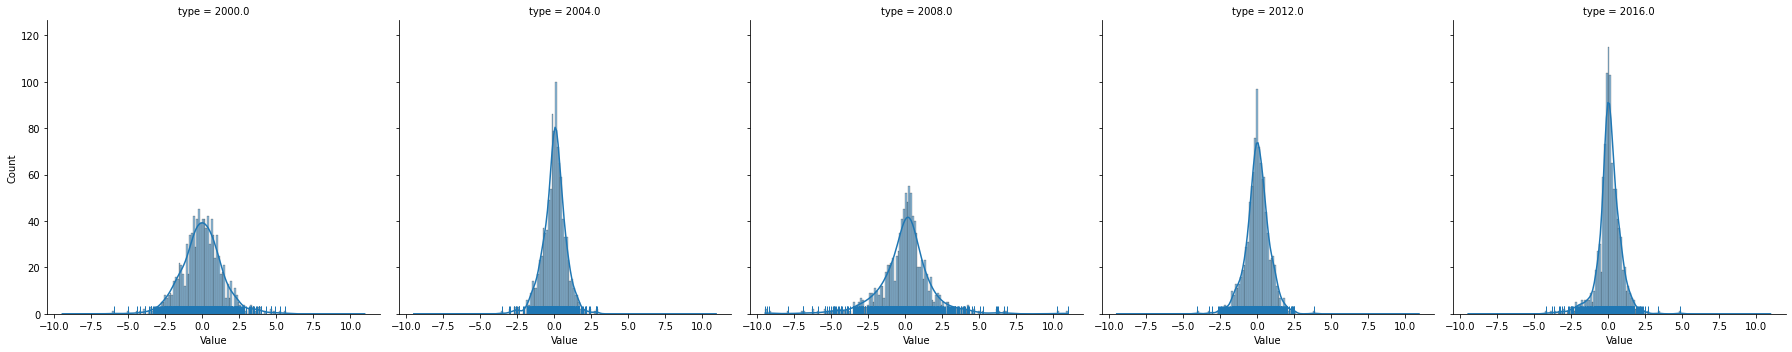

In [10]:
import seaborn as sns
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt


#Create the dataframe
l = int(len(df_data_diff.iloc[:,0]))
nb_col = int(len(df_data_diff.columns))

sb = np.empty((nb_col * l ,))
type = np.empty((nb_col * l ,))

for x in range(len(df_data_diff.columns)):
    
    tmp = df_data_diff.iloc[:,x]
    
    sb[x*l : (x+1)*l] = tmp
    
    type[x*l : (x+1)*l] = date[x]

graph = pd.DataFrame({"Value": sb, "type":type})


sns.displot(data=graph, col='type', x='Value', kde= True, palette='tab10', rug=True)


info = pd.DataFrame({"Skewness" : df_data_diff.apply(skew), "Kurtosis":df_data_diff.apply(kurtosis)})


info


Évaluons pour tout les séries de rendement du SP500

c:\Users\Sébastien\Desktop\Github_RSDC\RSDC\Function_garch.py:80: RuntimeWarning: invalid value encountered in log
  LogL = -np.sum(-np.log(sigma_2) - U**2 / sigma_2 )
c:\Users\Sébastien\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\common.py:208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


,2000,2004,2008,2012,2016
estimators,"[0.028, 0.0937, 0.8962]","[0.0143, 0.0492, 0.926]","[0.027, 0.1091, 0.8826]","[0.0736, 0.1456, 0.7419]","[0.0431, 0.2026, 0.7391]"
sigma2,"[2.7787, 3.9509, 3.5723, 3.2304, 3.5927, 3.363...","[0.576, 0.5869, 0.569, 0.5552, 0.562, 0.5356, ...","[3.2462, 3.0965, 2.8875, 3.2705, 2.948, 3.5798...","[0.6534, 0.5584, 0.4957, 0.4771, 0.4458, 0.581...","[0.7396, 1.1453, 1.8557, 1.4152, 1.3694, 1.109..."
return_std,"[-2.3456, 0.0966, 0.0505, 1.4872, 0.5871, -0.7...","[-1.1762, 0.6233, -0.7087, 1.1086, 0.1804, 0.9...","[-0.7598, 0.6144, -1.4854, -0.3112, -1.7195, -...","[0.0383, 0.3123, -0.7045, 0.5134, 1.6544, 0.64...","[1.9253, -2.0404, 0.039, -0.9888, 0.4428, 1.90..."


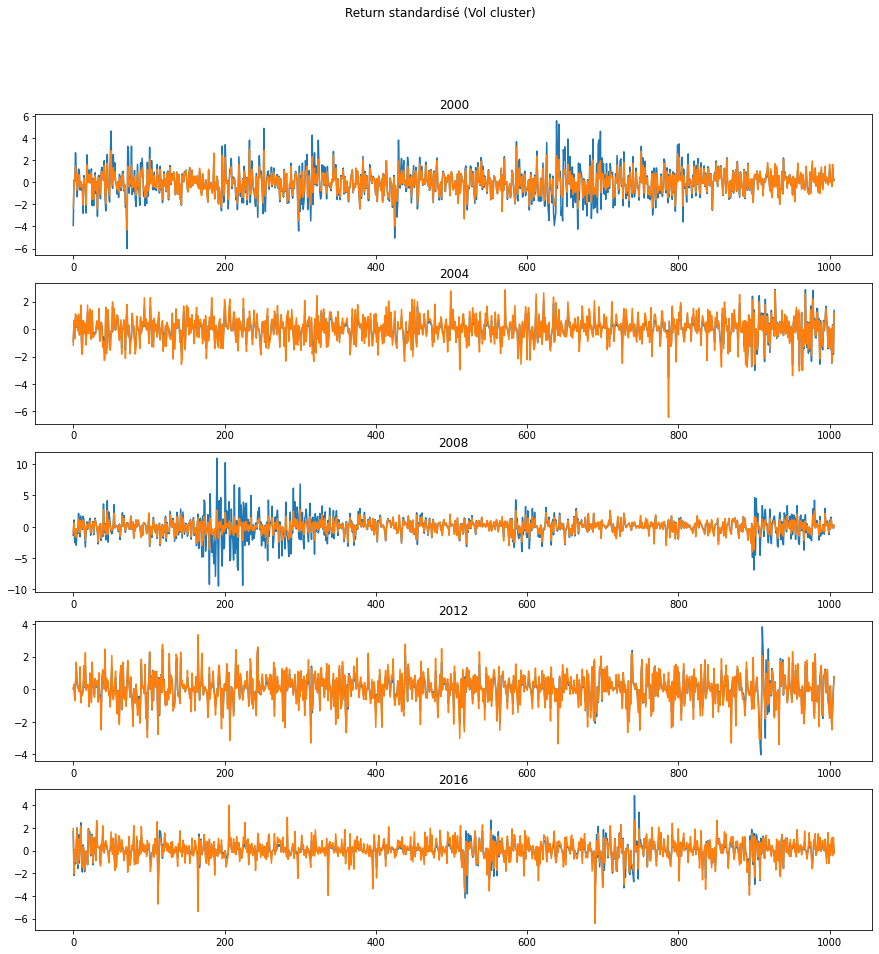

In [11]:
#On commence les manipulation avec les fonctions 

#On créer les returns dataframe


nb_bins = 5
date =['2000', '2004', '2008', '2012', '2016']


#Prendre la première différence
df_data_diff = df_data.apply(fg.logf_diff)


#Création du df qui va avoir les résultats       
df_result = pd.DataFrame()

for i in range(nb_bins):
    tmp = fg.generer_estime(np.array(df_data_diff.iloc[:,i]))
    df_result.insert(i, date[i], value= tmp)
        
df_result.index =["estimators", "sigma2", "return_std"]

x = np.arange(0, len(df_result.iloc[2,0]))




fig, axs = plt.subplots(len(date), figsize=(15, 15))
fig.suptitle('Return standardisé (Vol cluster)')

for i in range(len(date)):
    
    period = i
    re_std = df_result.iloc[2,period]
    ret = df_data_diff.iloc[:,period]
    
#Ploting 
    axs[i].plot(x, ret)
    axs[i].plot(x,re_std) 
    axs[i].set_title(date[i])
    
    
    
df_result


